In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [47]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values
print(X[:3, :])
print('-'*15)
print(y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


In [55]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display first 3 rows
print(X_train[:3])
print('-' * 15)
print(y_train[:3])
print('-' * 15)
print(X_test[:3])
print('-' * 15)
print(y_test[:3])


[[    57 122000]
 [    39  71000]
 [    47  25000]]
---------------
[1 0 1]
---------------
[[   46 22000]
 [   59 88000]
 [   28 44000]]
---------------
[0 1 0]


In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [59]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]]
---------------
[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]]


In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [63]:
print(y_pred[:20])
print(y_test[:20])

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1]
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1]


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  2]
 [12 25]]


In [67]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [69]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).
 cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColorm
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (716974907.py, line 5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_22004\905818225.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)


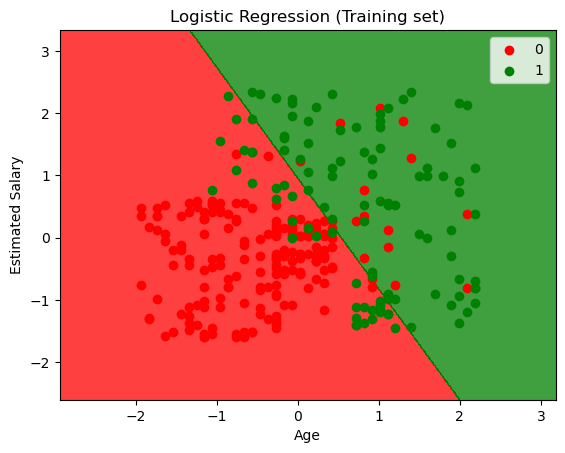

In [71]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(
    np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01)
)

plt.contourf(
    X1,X2,
    classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red','green'))
)

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\prasa\AppData\Local\Temp\ipykernel_22004\455464742.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)


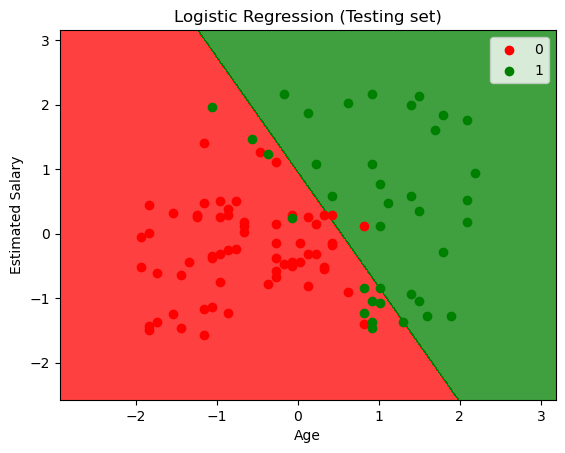

In [73]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(
    np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(
    X1,X2,
    classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
